In [14]:
import pandas as pd

# Assuming the dataset is in CSV format
file_path = "C:\\Users\\sweta\\Downloads\\melbourne_housing.csv"
df = pd.read_csv(file_path)

In [15]:
print(df.head())

       Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5      3067  ...         1  1.0       202           NaN   
1   4/2/2016       2.5      3067  ...         1  0.0       156          79.0   
2   4/3/2017       2.5      3067  ...         2  0.0       134         150.0   
3   4/3/2017       2.5      3067  ...         2  1.0        94           NaN   
4   4/6/2016       2.5      3067  ...         1  2.0       120         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN      

In [16]:
# Split the dataset into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import numpy as np

# Normalize the features
scaler = StandardScaler()
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


In [21]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 164799717038.51993


In [27]:
import matplotlib.pyplot as plt

correlation = X_test.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


NameError: name 'sns' is not defined

<Figure size 1400x1000 with 0 Axes>

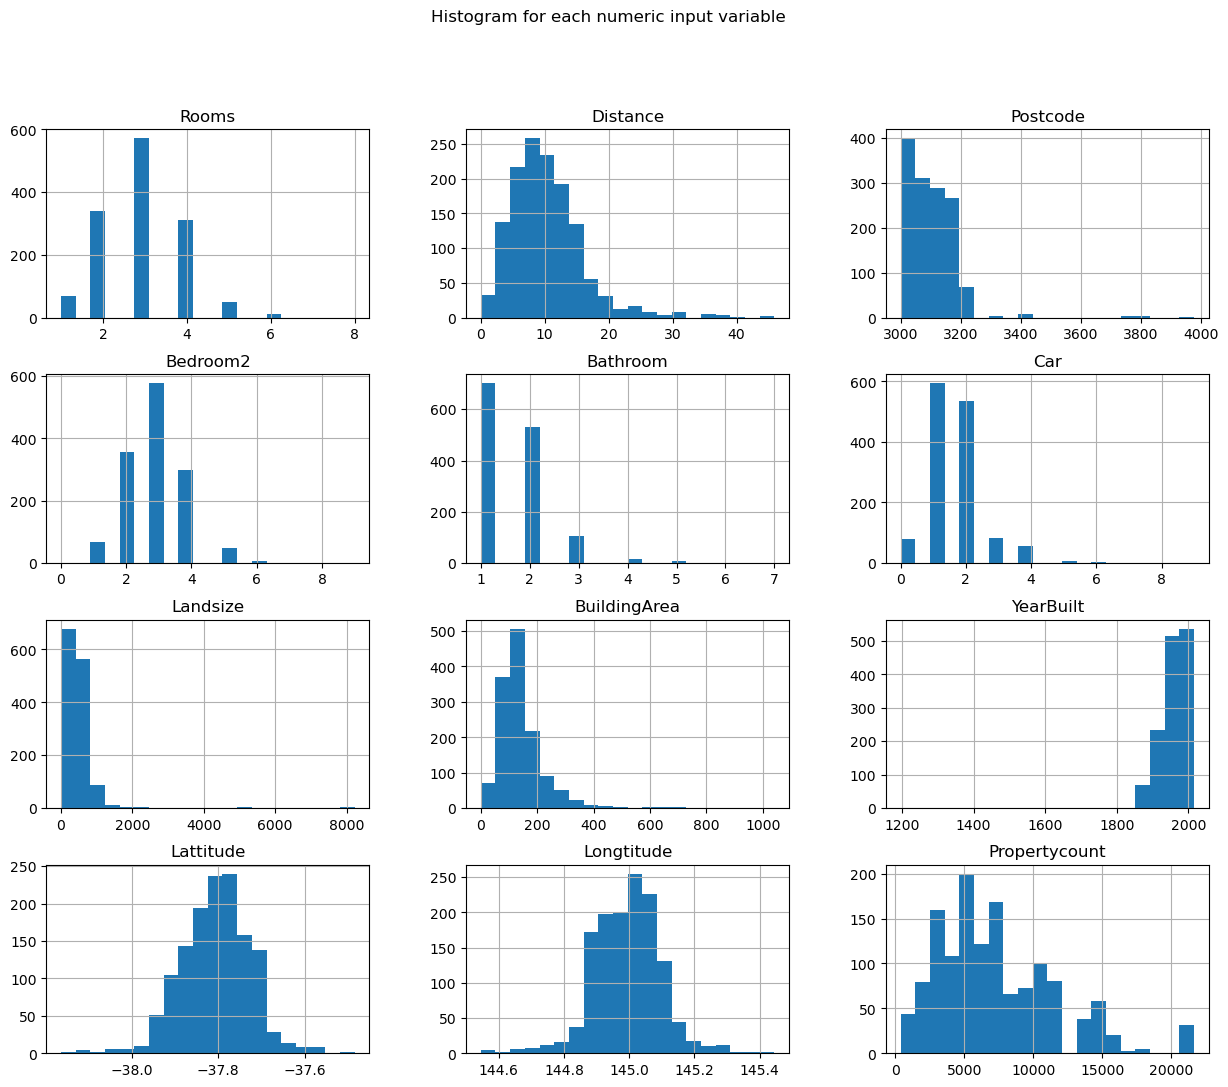

In [28]:
X_test.hist(figsize=(15, 12), bins=20)
plt.suptitle("Histogram for each numeric input variable")
plt.show()

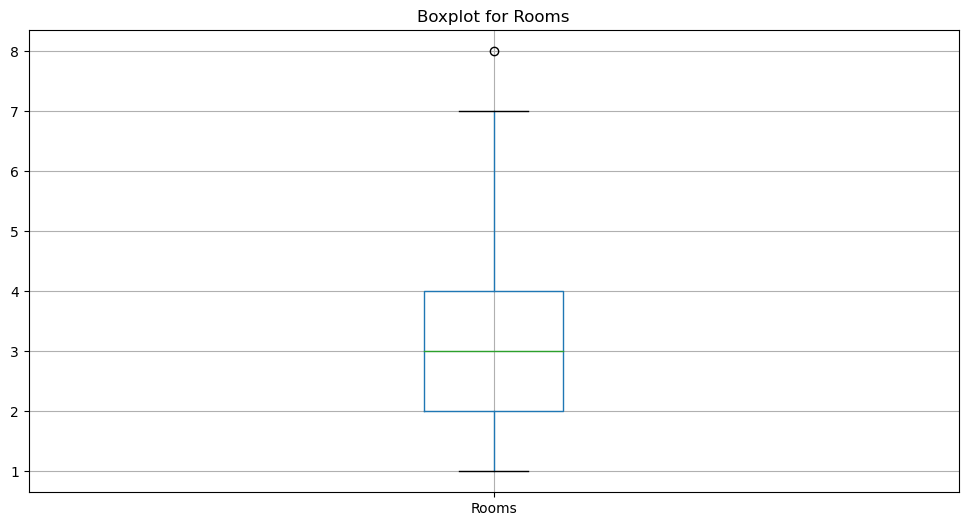

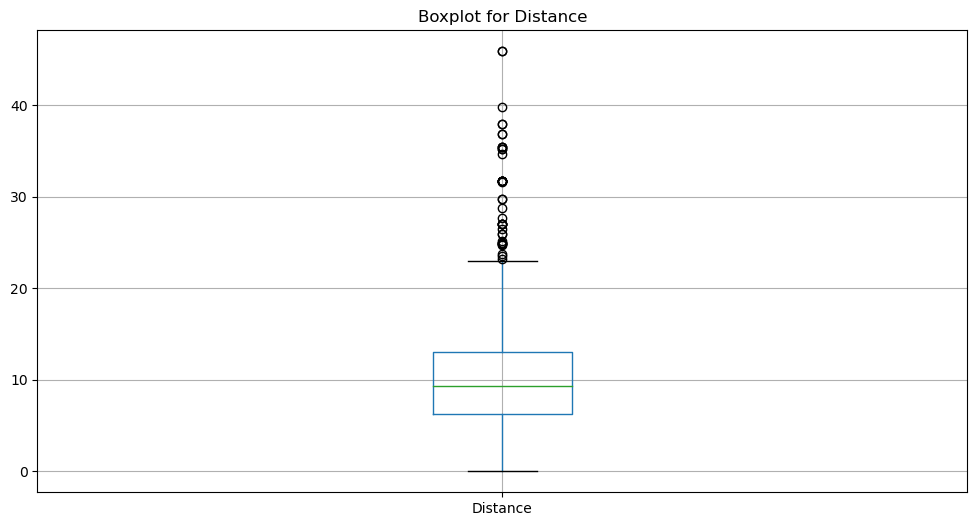

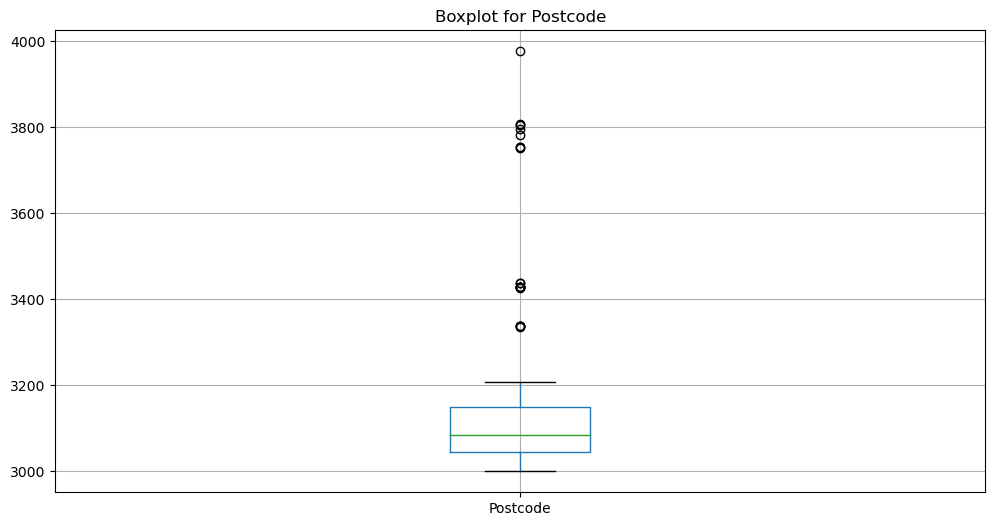

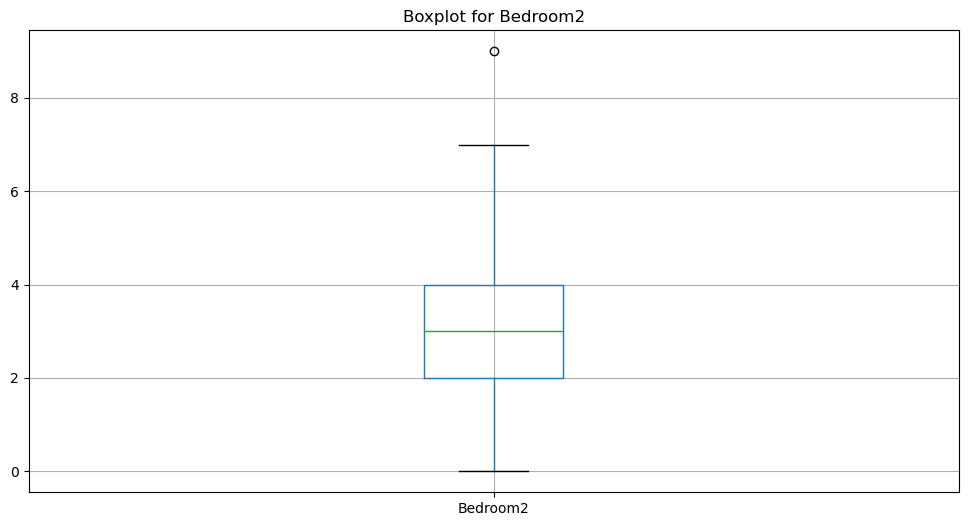

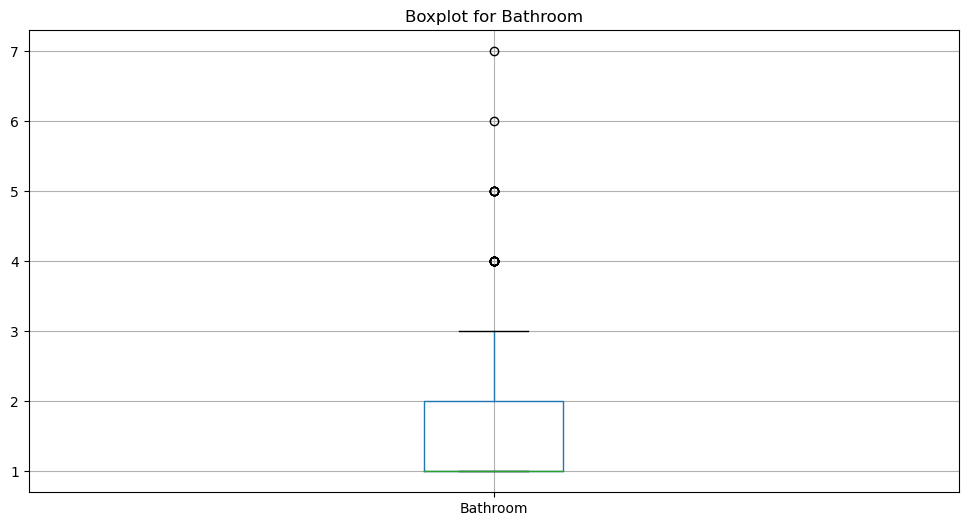

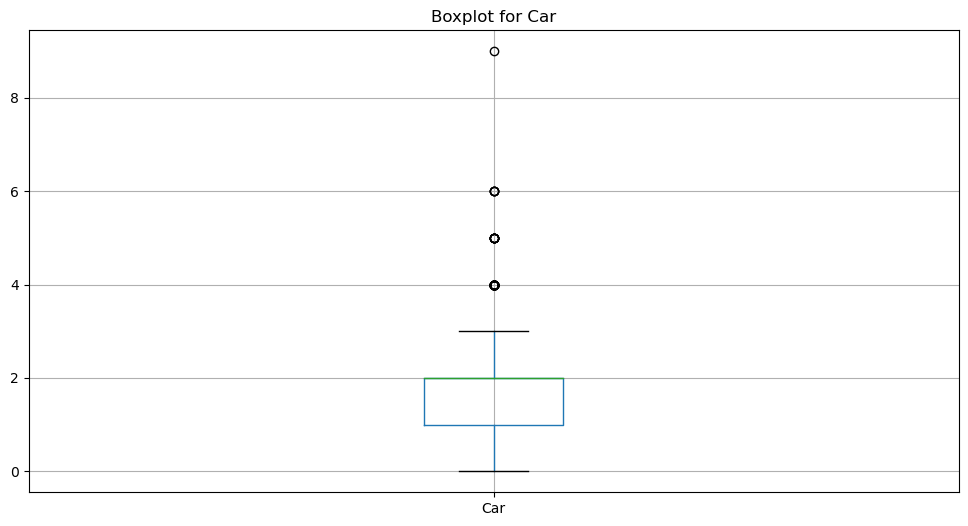

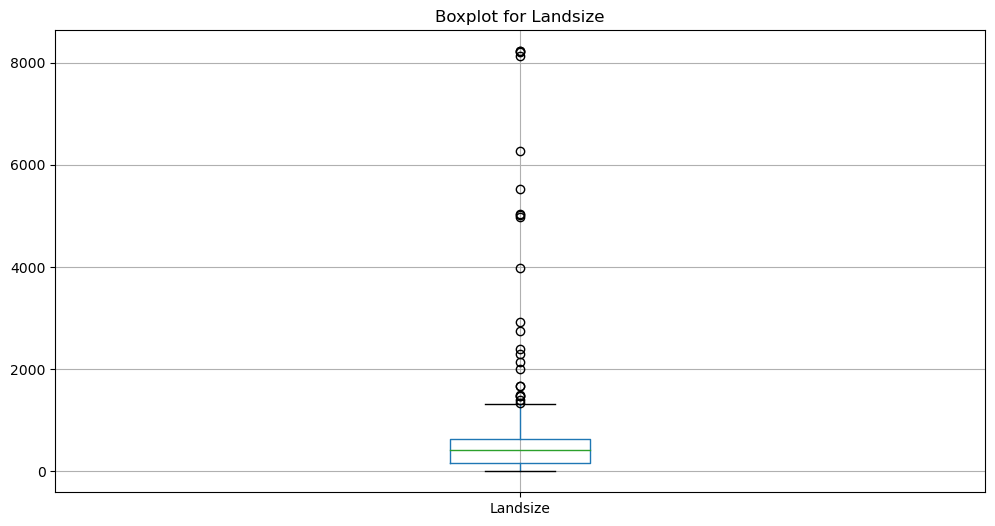

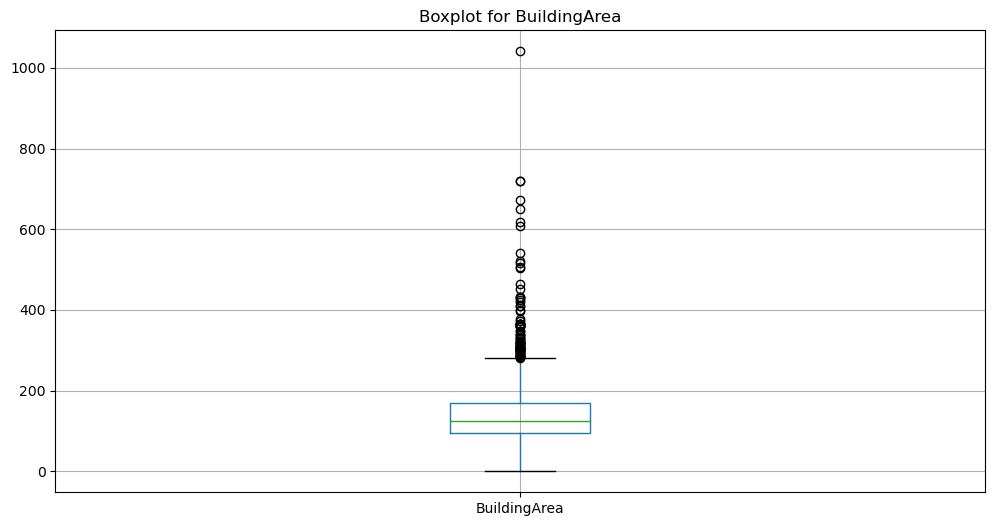

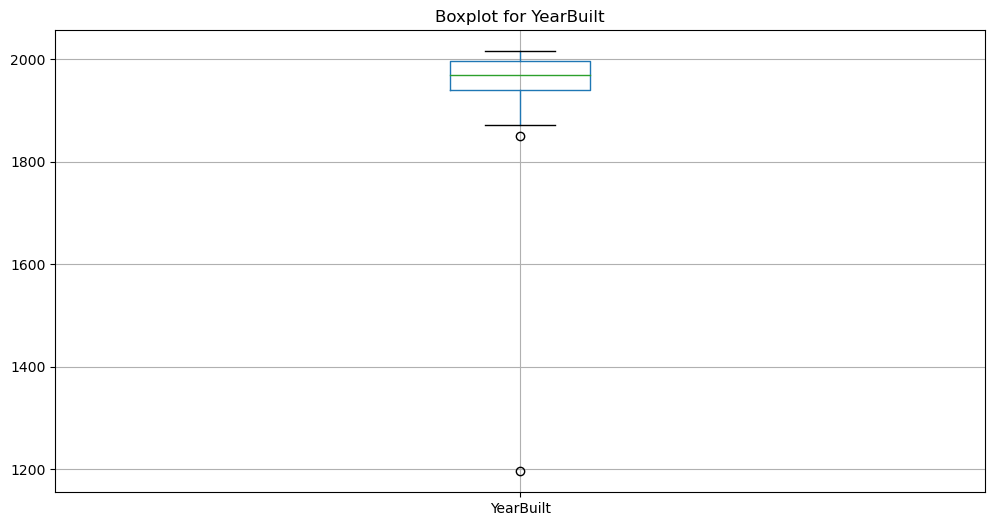

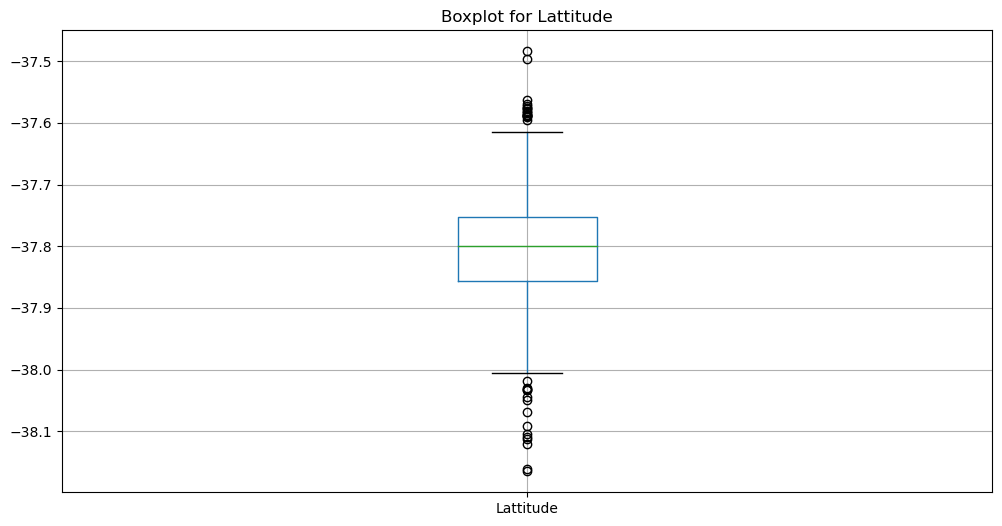

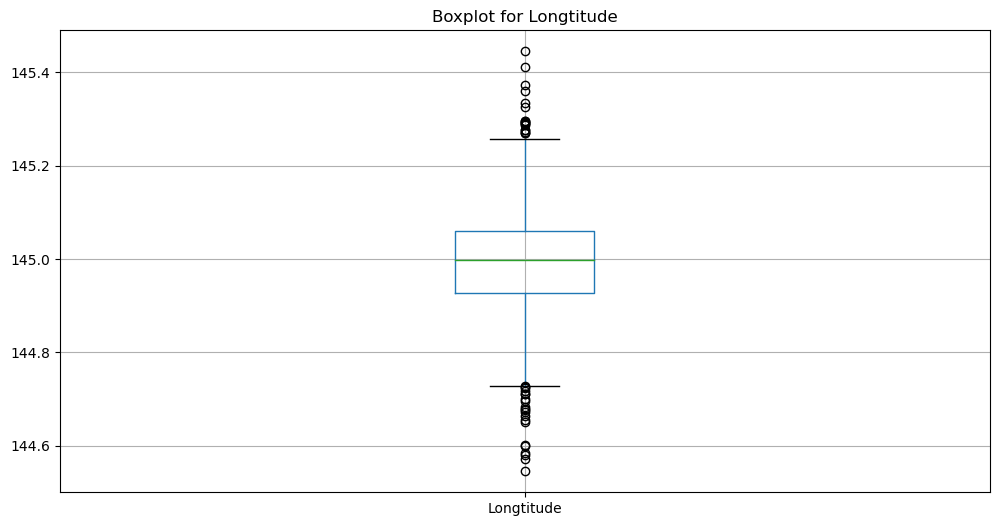

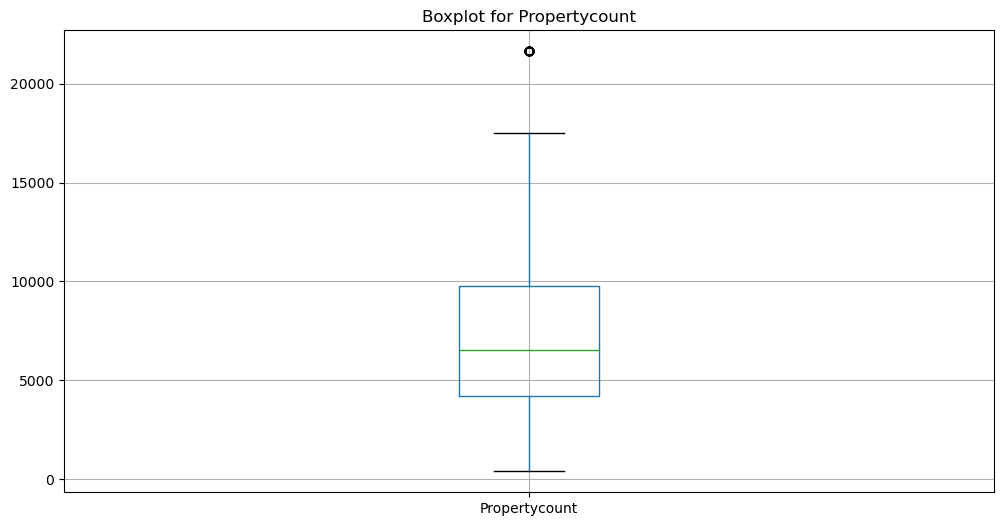

In [29]:
for column in X_test.columns:
    plt.figure(figsize=(12, 6))
    X_test.boxplot([column])
    plt.title(f"Boxplot for {column}")
    plt.show()

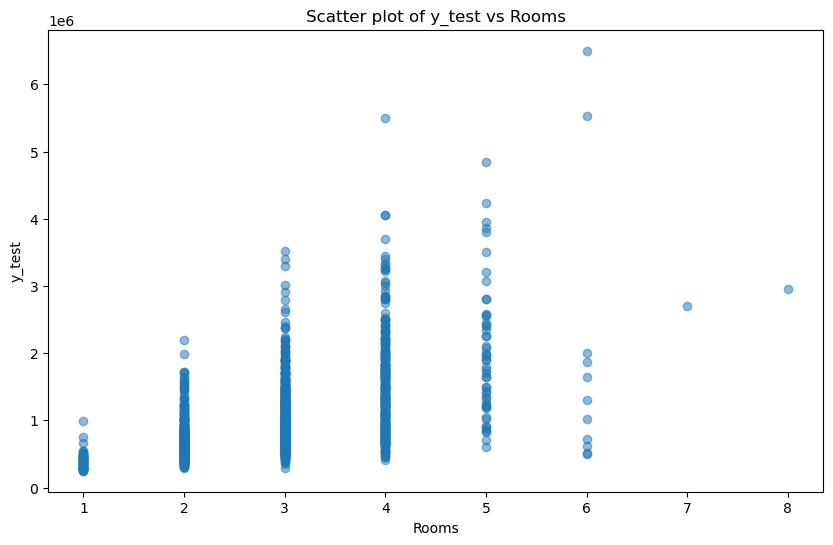

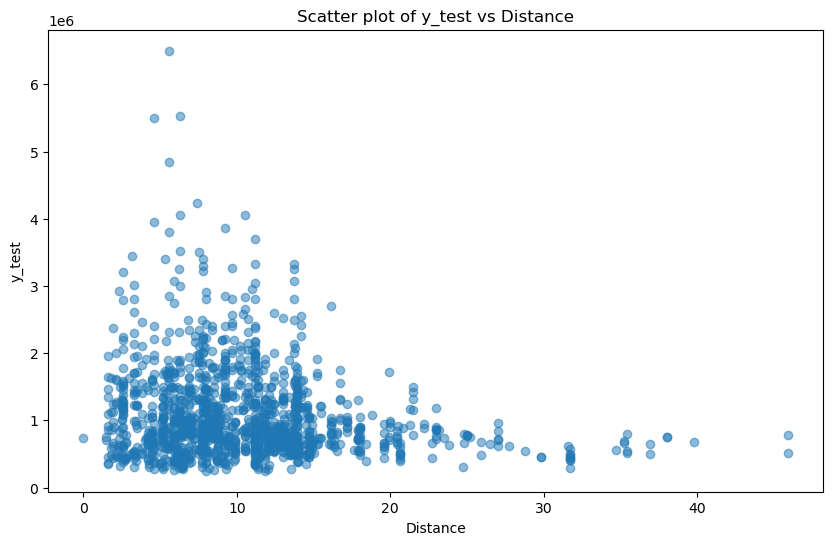

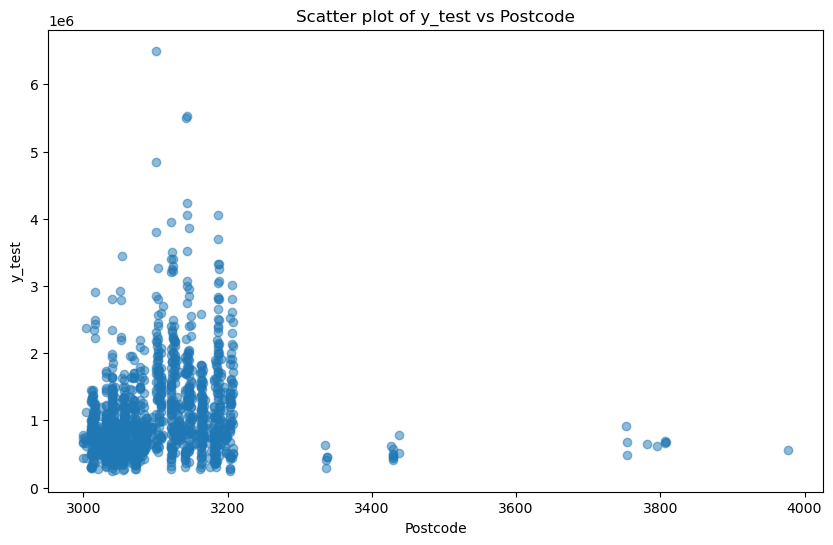

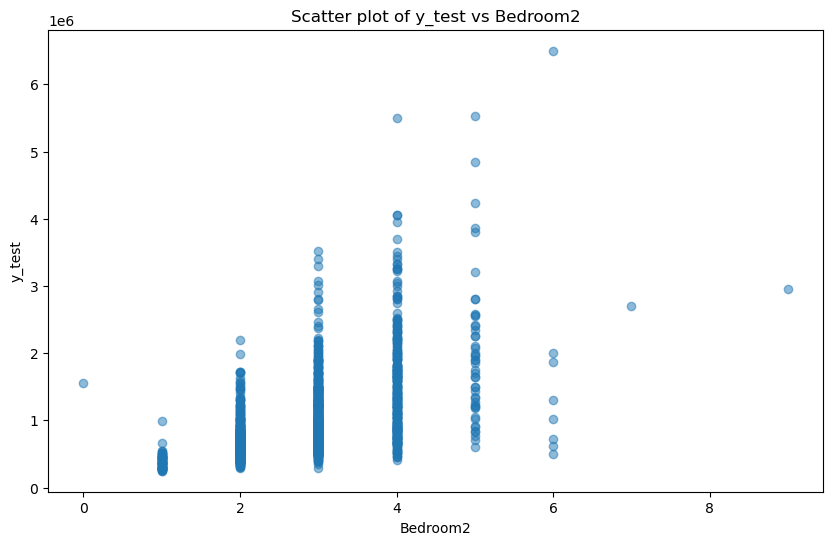

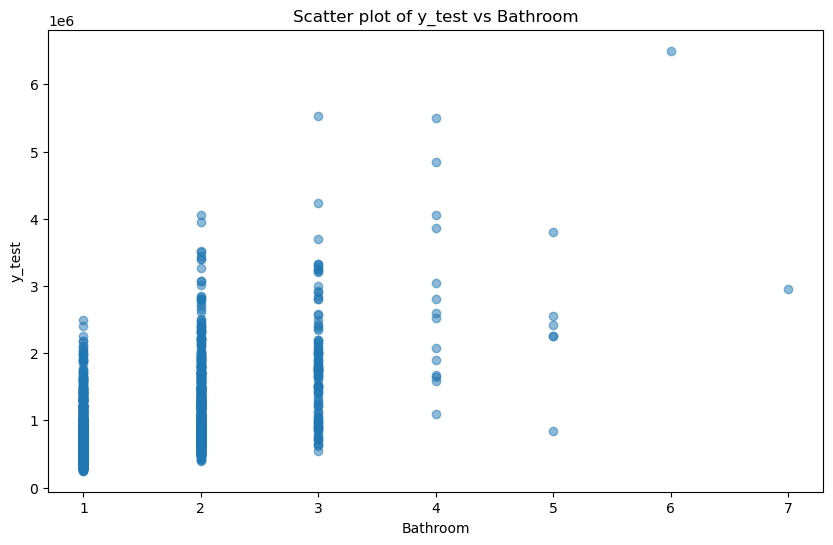

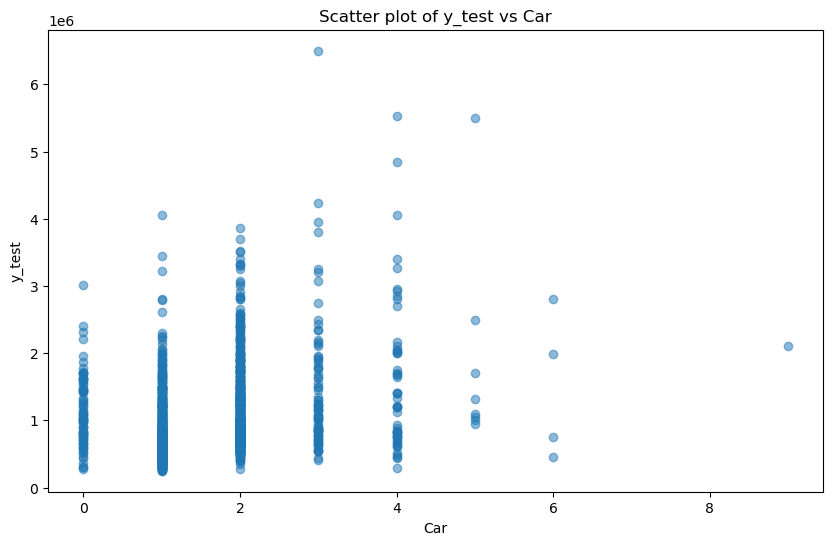

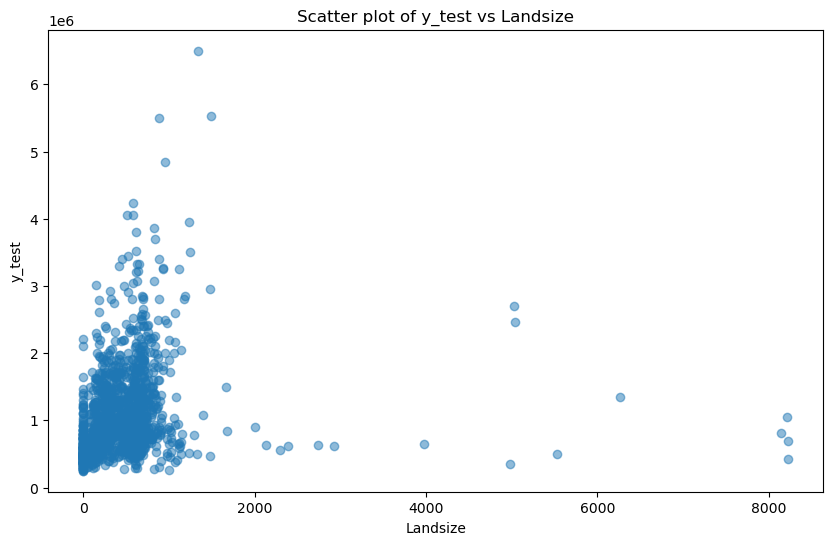

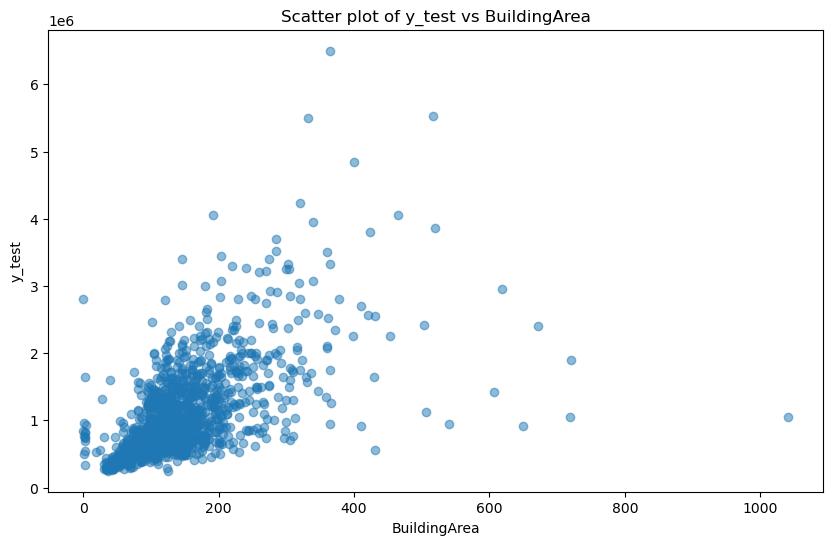

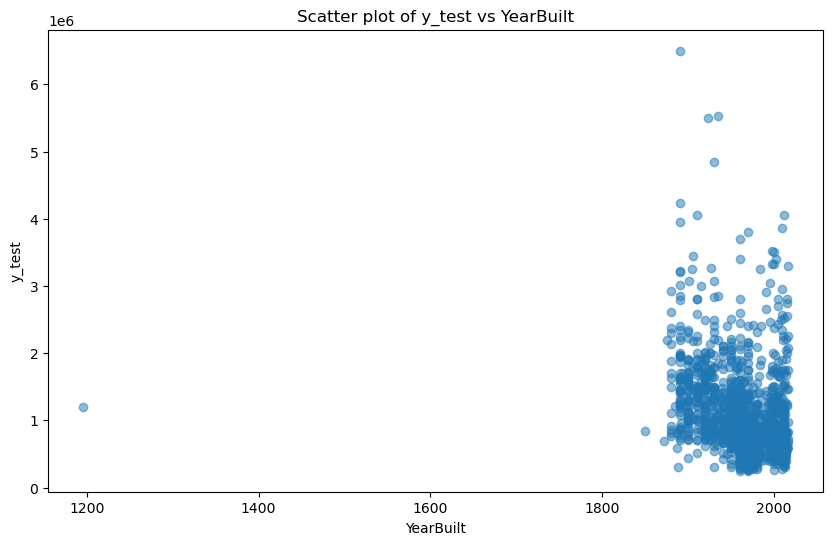

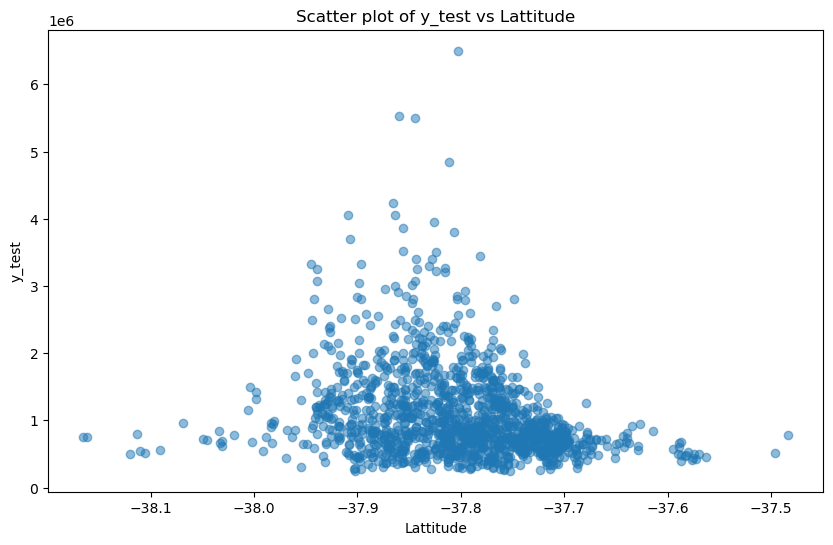

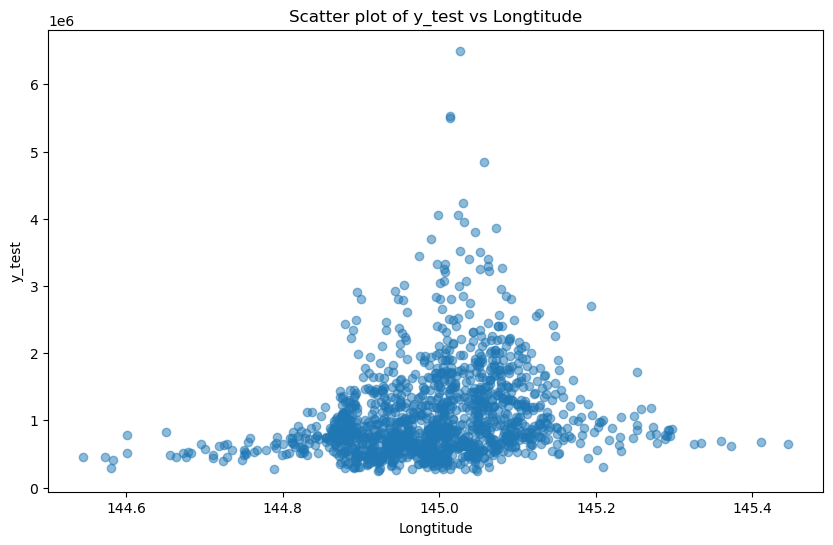

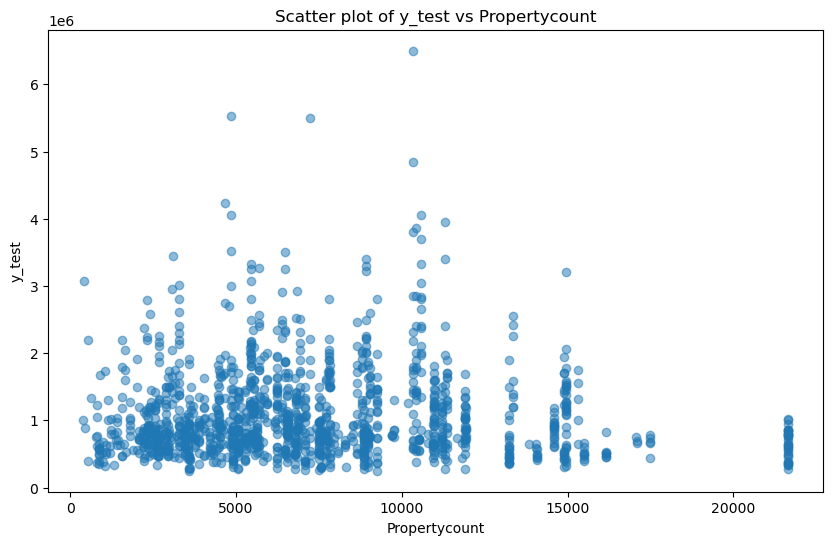

In [30]:
# Assuming y_test is a Series or 1D numpy array
for column in X_test.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[column], y_test, alpha=0.5)
    plt.title(f'Scatter plot of y_test vs {column}')
    plt.xlabel(column)
    plt.ylabel('y_test')
    plt.show()

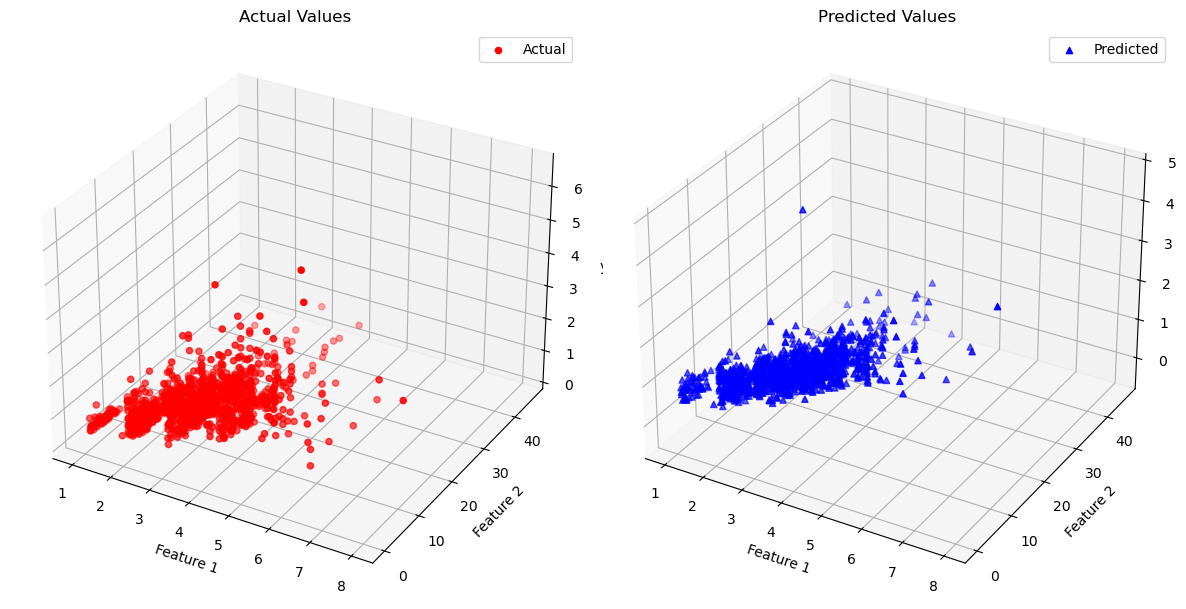

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract two features for visualization
# For simplicity, I'm taking the first two columns. Adjust the indices if needed.
X1_test = X_test.iloc[:, 0].values
X2_test = X_test.iloc[:, 1].values


fig = plt.figure(figsize=(12, 6))

# Actual values
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X1_test, X2_test, y_test, c='r', marker='o', label="Actual")
ax1.set_title("Actual Values")
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('y')
ax1.legend()

# Predicted values
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X1_test, X2_test, y_pred, c='b', marker='^', label="Predicted")
ax2.set_title("Predicted Values")
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('y_pred')
ax2.legend()

plt.tight_layout()
plt.show()


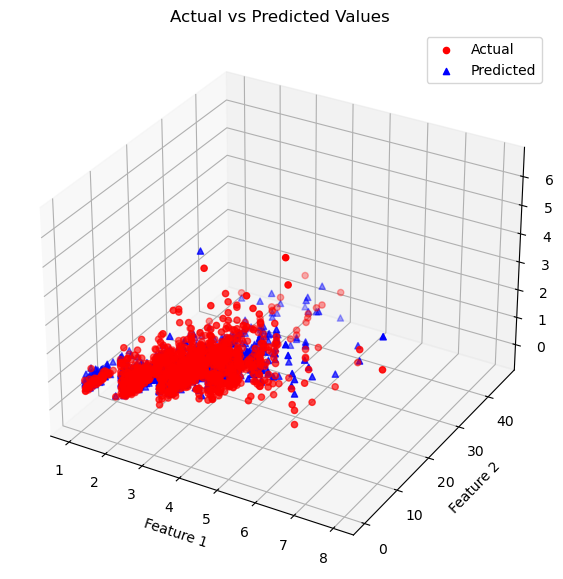

In [32]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual values
ax.scatter(X1_test, X2_test, y_test, c='r', marker='o', label="Actual")

# Predicted values
ax.scatter(X1_test, X2_test, y_pred, c='b', marker='^', label="Predicted")

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('y')
ax.set_title("Actual vs Predicted Values")
ax.legend()

plt.show()


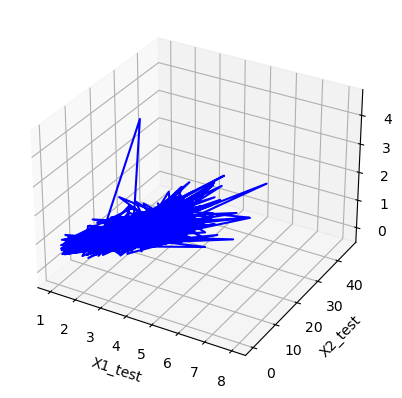

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(X1_test, X2_test, y_pred, color='b')
ax.set_xlabel('X1_test')
ax.set_ylabel('X2_test')
ax.set_zlabel('Predictions')
plt.show()